In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, SimpleRNN
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

In [23]:
#Some user-defined functions 

def predictions_plot(test,predicted):
  plt.figure(figsize=(15,7))
  plt.plot(test, color='red', label='Real Sensex Stock Price')
  plt.plot(predicted, color='blue', label='Predicted Sensex Stock Price')
  plt.title('SENSEX STOCK PRICE PREDICTION')
  plt.xlabel('Time')
  plt.ylabel('SENSEX Stock Price')
  plt.legend()
  plt.show()

def rmse_return(test,predicted):
  rmse = math.sqrt(mean_squared_error(test,predicted))
  print('The RMSE is {}'.format(rmse))

**Collecting the Data**

In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/Sensex Data.csv', index_col='Date',parse_dates=["Date"])
dataset.head()

,Open,High,Low,Close,Volume
Date,,,,,
1986-01-02 15:30:00,549.43,549.43,549.43,549.43,0
1986-01-03 15:30:00,561.01,561.01,561.01,561.01,0
1986-01-07 15:30:00,564.35,564.35,564.35,564.35,0
1986-01-08 15:30:00,570.53,570.53,570.53,570.53,0
1986-01-09 15:30:00,577.64,577.64,577.64,577.64,0


In [4]:
dataset.tail(50)

,Open,High,Low,Close,Volume
Date,,,,,
2023-01-18 15:30:00,60716.03,61110.25,60569.19,61045.74,0
2023-01-19 15:30:00,60920.02,61032.47,60716.55,60858.43,0
2023-01-20 15:30:00,60901.16,61001.18,60585.25,60621.77,0
2023-01-23 15:30:00,60876.01,61113.27,60761.88,60941.67,0
2023-01-24 15:30:00,61122.20,61266.06,60849.12,60978.75,0
2023-01-25 15:30:00,60834.73,60899.21,60081.36,60205.06,0
2023-01-27 15:30:00,60166.90,60166.90,58974.70,59330.90,0
2023-01-30 15:30:00,59101.69,59644.24,58699.20,59500.41,0
2023-01-31 15:30:00,59770.83,59787.63,59104.59,59549.90,0


In [5]:
dataset.shape

(8836, 5)

**HIGH**

In [6]:
print(type(dataset))
print(type(dataset[:'2016']['High']))
print(type(dataset[:'2016']['High'].values))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


In [7]:
training_set = dataset[:'2016']['High'].values.reshape(-1,1) #taking the values from 'High' column
test_set = dataset["2017":]['High'].values.reshape(-1,1)
print(training_set.shape, test_set.shape, dataset.shape)
type(training_set), type(test_set)

(7291, 1) (1545, 1) (8836, 5)


(numpy.ndarray, numpy.ndarray)

We got Series Object. 
Series object can be indexed

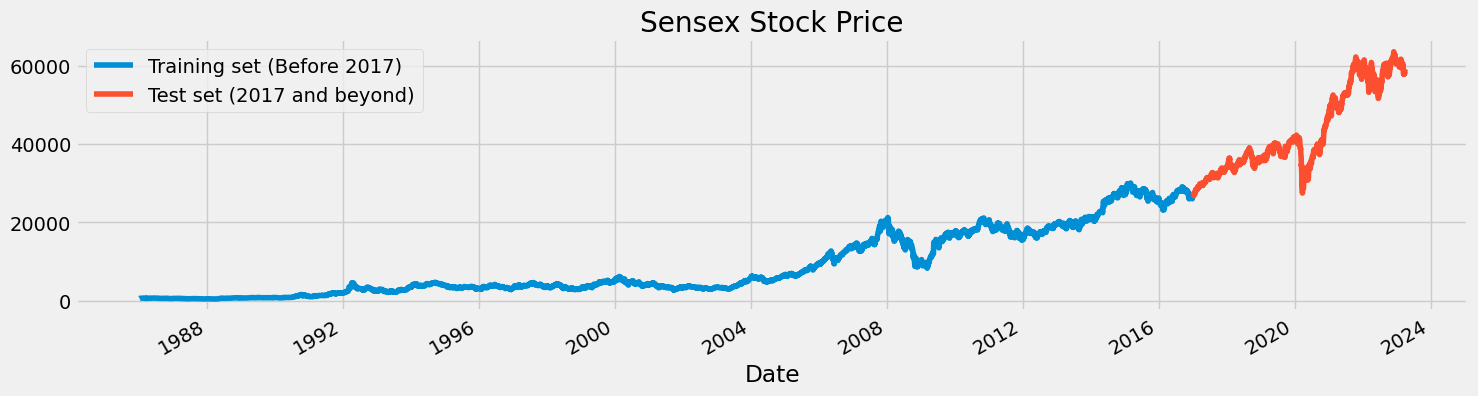

In [26]:
dataset['High'][:'2016'].plot(figsize=(16,4),legend=True)
dataset['High']['2017':].plot(figsize=(16,4),legend=True)
plt.legend(['Training set (Before 2017)','Test set (2017 and beyond)'])
plt.title('Sensex Stock Price')
plt.show()

In [9]:
 #scaling the training set

 sc = MinMaxScaler(feature_range=(0,1))
 training_set_scaled = sc.fit_transform(training_set)
 training_set_scaled.shape

(7291, 1)

In [10]:
training_set[:10]

array([[549.43],
       [561.01],
       [564.35],
       [570.53],
       [577.64],
       [593.08],
       [578.98],
       [567.14],
       [575.68],
       [581.24]])

In [11]:

training_set_scaled[:10]

array([[0.00537983],
       [0.00577059],
       [0.0058833 ],
       [0.00609184],
       [0.00633176],
       [0.00685277],
       [0.00637698],
       [0.00597744],
       [0.00626562],
       [0.00645324]])

In [12]:
X_train = []
y_train = []
train_len = len(training_set_scaled)
for i in range(60,train_len):
  X_train.append(training_set_scaled[i-60:i,0])
  y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)
print(X_train.shape, y_train.shape)

(7231, 60) (7231,)


In [13]:
X_train[0]

array([0.00537983, 0.00577059, 0.0058833 , 0.00609184, 0.00633176,
       0.00685277, 0.00637698, 0.00597744, 0.00626562, 0.00645324,
       0.00642692, 0.00669923, 0.00667527, 0.0068197 , 0.00638609,
       0.00648732, 0.00675154, 0.00701407, 0.00793899, 0.00791706,
       0.00802572, 0.00834629, 0.00899114, 0.0088133 , 0.00843874,
       0.00844853, 0.00823291, 0.00800446, 0.00784485, 0.0080166 ,
       0.0082049 , 0.00819646, 0.00875628, 0.00900598, 0.00800075,
       0.0075398 , 0.00705793, 0.00680519, 0.00573955, 0.00669113,
       0.00688078, 0.00686897, 0.00603683, 0.00575676, 0.00556205,
       0.00504847, 0.00455614, 0.00617417, 0.00646167, 0.00621264,
       0.00576148, 0.00610567, 0.00648496, 0.00677921, 0.0067188 ,
       0.00729752, 0.00724116, 0.00786813, 0.00796531, 0.00785531])

For being used by the RNN\GRU\LSTM layers, we need the shape of X_train to be [batch_size, time_steps, Features]



*   We will use the full data in a single batch, so batch size will be 948
*   There are 60 time steps


*   At each time step, the price us the feature, which is of 1-D. Compare this with a word, which can have higher dimension based on the word embedding chosen





In [14]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
print(X_train.shape)

(7231, 60, 1)


**Create the Model**



*   Units- hidden layers dimensions (no. of neurons
*   return sequences - when True, returns the ouput of each time step. Default False, returns the last output



In [15]:
model = Sequential()
model.add(SimpleRNN(50, input_shape = (X_train.shape[1],1), activation='tanh'))
model.add(Dropout(0.2))

model.add(Dense(units=1)) #the output layer

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 50)                2600      
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


**Train the model**



In [17]:
model.compile(optimizer='adam', loss='mean_squared_error')
#MSE because of Regression

model.fit(X_train, y_train, epochs=50, batch_size=150)

Epoch 1/50
49/49 [==============================] - 7s 44ms/step - loss: 0.0207
Epoch 2/50
49/49 [==============================] - 2s 42ms/step - loss: 0.0046
Epoch 3/50
49/49 [==============================] - 2s 37ms/step - loss: 0.0032
Epoch 4/50
49/49 [==============================] - 2s 37ms/step - loss: 0.0022
Epoch 5/50
49/49 [==============================] - 2s 47ms/step - loss: 0.0021
Epoch 6/50
49/49 [==============================] - 2s 50ms/step - loss: 0.0018
Epoch 7/50
49/49 [==============================] - 3s 52ms/step - loss: 0.0015
Epoch 8/50
49/49 [==============================] - 3s 64ms/step - loss: 0.0016
Epoch 9/50
49/49 [==============================] - 2s 33ms/step - loss: 0.0015
Epoch 10/50
49/49 [==============================] - 1s 26ms/step - loss: 0.0013
Epoch 11/50
49/49 [==============================] - 1s 20ms/step - loss: 0.0012
Epoch 12/50
49/49 [==============================] - 1s 19ms/step - loss: 0.0012
Epoch 13/50
49/49 [==================

**Test the model**



*  We use the previous 60 days stock prices to predict the next day.
*  So, we need the 60 days price before the 1st date in the test dataset


*  Accordingly, we create the input for predicition, index starting from the the date 60 days before the first date in the test dataset




In [18]:
dataset_total = dataset['High']
inputs = dataset_total[len(dataset_total)-len(test_set) - 60:].values
print(len(dataset_total), len(test_set))
print(inputs.shape)
inputs = inputs.reshape(-1,1)
print(inputs.shape)
inputs = sc.transform(inputs)

8836 1545
(1605,)
(1605, 1)


In [19]:
X_test = []
for i in range(60,len(inputs)):
  X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
print(X_test.shape)

X_test = np.expand_dims(X_test,2)
print(X_test.shape)

(1545, 60)
(1545, 60, 1)


In [20]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

49/49 [==============================] - 0s 5ms/step


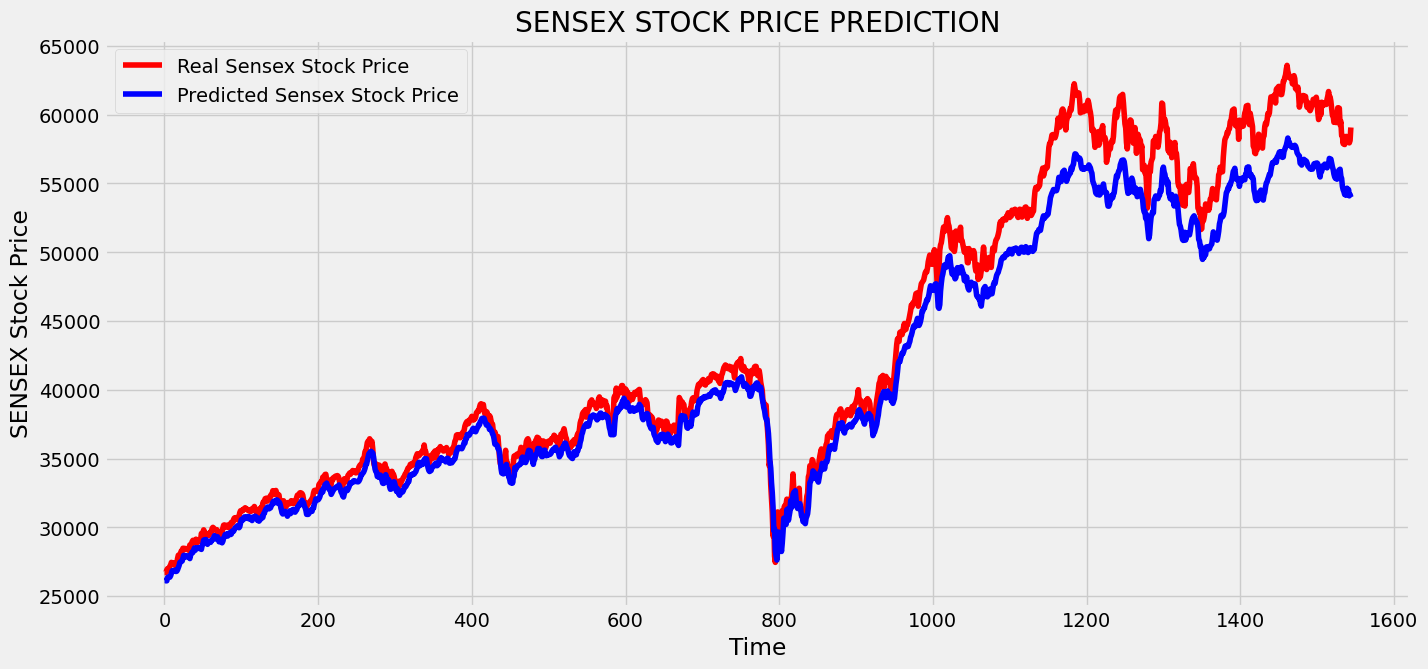

In [24]:
#Visualisng the results 
predictions_plot(test_set, predicted_stock_price)

In [22]:
rmse_return(test_set, predicted_stock_price)

The RMSE is 2369.9814488575516


**LOW**

In [27]:
dataset.head()

,Open,High,Low,Close,Volume
Date,,,,,
1986-01-02 15:30:00,549.43,549.43,549.43,549.43,0
1986-01-03 15:30:00,561.01,561.01,561.01,561.01,0
1986-01-07 15:30:00,564.35,564.35,564.35,564.35,0
1986-01-08 15:30:00,570.53,570.53,570.53,570.53,0
1986-01-09 15:30:00,577.64,577.64,577.64,577.64,0


In [46]:
training_set = dataset[:'2020']['Low'].values.reshape(-1,1) #taking the values from 'High' column
test_set = dataset["2021":]['Low'].values.reshape(-1,1)
print(training_set.shape, test_set.shape, dataset.shape)
type(training_set), type(test_set)

(8279, 1) (557, 1) (8836, 5)


(numpy.ndarray, numpy.ndarray)

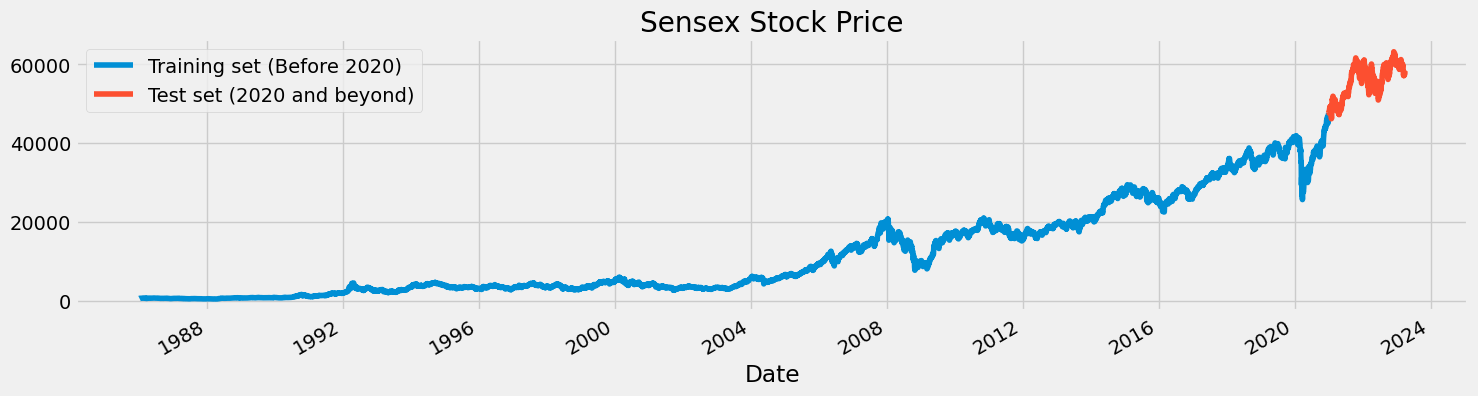

In [47]:
dataset['Low'][:'2020'].plot(figsize=(16,4),legend=True)
dataset['Low']['2021':].plot(figsize=(16,4),legend=True)
plt.legend(['Training set (Before 2020)','Test set (2020 and beyond)'])
plt.title('Sensex Stock Price')
plt.show()

In [48]:
 #scaling the training set

 sc = MinMaxScaler(feature_range=(0,1))
 training_set_scaled = sc.fit_transform(training_set)
 training_set_scaled.shape

(8279, 1)

In [49]:
training_set[:10]


array([[549.43],
       [561.01],
       [564.35],
       [570.53],
       [577.64],
       [593.08],
       [578.98],
       [567.14],
       [575.68],
       [581.24]])

In [50]:
training_set_scaled[:10]

array([[0.00337689],
       [0.00362216],
       [0.00369291],
       [0.00382381],
       [0.0039744 ],
       [0.00430144],
       [0.00400279],
       [0.003752  ],
       [0.00393289],
       [0.00405065]])

In [51]:
X_train = []
y_train = []
train_len = len(training_set_scaled)
for i in range(60,train_len):
  X_train.append(training_set_scaled[i-60:i,0])
  y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)
print(X_train.shape, y_train.shape)

(8219, 60) (8219,)


In [52]:
X_train[0]

array([0.00337689, 0.00362216, 0.00369291, 0.00382381, 0.0039744 ,
       0.00430144, 0.00400279, 0.003752  , 0.00393289, 0.00405065,
       0.00403413, 0.00420506, 0.00419003, 0.00428068, 0.0040085 ,
       0.00407205, 0.00423789, 0.00440268, 0.00498325, 0.00496949,
       0.00503769, 0.00523891, 0.00564368, 0.00553205, 0.00529694,
       0.00530309, 0.00516774, 0.00502435, 0.00492416, 0.00503197,
       0.00515016, 0.00514487, 0.00549626, 0.005653  , 0.00502202,
       0.00473268, 0.00443022, 0.00427157, 0.00360268, 0.00419998,
       0.00431902, 0.0043116 , 0.00378928, 0.00361348, 0.00349126,
       0.00316889, 0.00285986, 0.00387549, 0.00405595, 0.00389963,
       0.00361644, 0.00383249, 0.00407056, 0.00425526, 0.00421735,
       0.0045806 , 0.00454523, 0.00493877, 0.00499978, 0.00493073])

In [53]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
print(X_train.shape)

(8219, 60, 1)


In [54]:
model = Sequential()
model.add(SimpleRNN(50, input_shape = (X_train.shape[1],1), activation='tanh'))
model.add(Dropout(0.2))

model.add(Dense(units=1)) #the output layer

In [55]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 50)                2600      
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [56]:
model.compile(optimizer='adam', loss='mean_squared_error')
#MSE because of Regression

model.fit(X_train, y_train, epochs=50, batch_size=150)

Epoch 1/50
55/55 [==============================] - 4s 32ms/step - loss: 0.0483
Epoch 2/50
55/55 [==============================] - 2s 33ms/step - loss: 0.0057
Epoch 3/50
55/55 [==============================] - 2s 35ms/step - loss: 0.0034
Epoch 4/50
55/55 [==============================] - 1s 21ms/step - loss: 0.0025
Epoch 5/50
55/55 [==============================] - 1s 17ms/step - loss: 0.0021
Epoch 6/50
55/55 [==============================] - 1s 18ms/step - loss: 0.0017
Epoch 7/50
55/55 [==============================] - 1s 19ms/step - loss: 0.0016
Epoch 8/50
55/55 [==============================] - 1s 19ms/step - loss: 0.0013
Epoch 9/50
55/55 [==============================] - 1s 19ms/step - loss: 0.0013
Epoch 10/50
55/55 [==============================] - 1s 18ms/step - loss: 0.0012
Epoch 11/50
55/55 [==============================] - 1s 19ms/step - loss: 0.0012
Epoch 12/50
55/55 [==============================] - 1s 23ms/step - loss: 0.0010
Epoch 13/50
55/55 [==================

In [39]:
dataset_total = dataset['Low']
inputs = dataset_total[len(dataset_total)-len(test_set) - 60:].values
print(len(dataset_total), len(test_set))
print(inputs.shape)
inputs = inputs.reshape(-1,1)
print(inputs.shape)
inputs = sc.transform(inputs)

8836 2038
(2098,)
(2098, 1)


In [40]:
X_test = []
for i in range(60,len(inputs)):
  X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
print(X_test.shape)

X_test = np.expand_dims(X_test,2)
print(X_test.shape)

(2038, 60)
(2038, 60, 1)


In [41]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

64/64 [==============================] - 0s 5ms/step


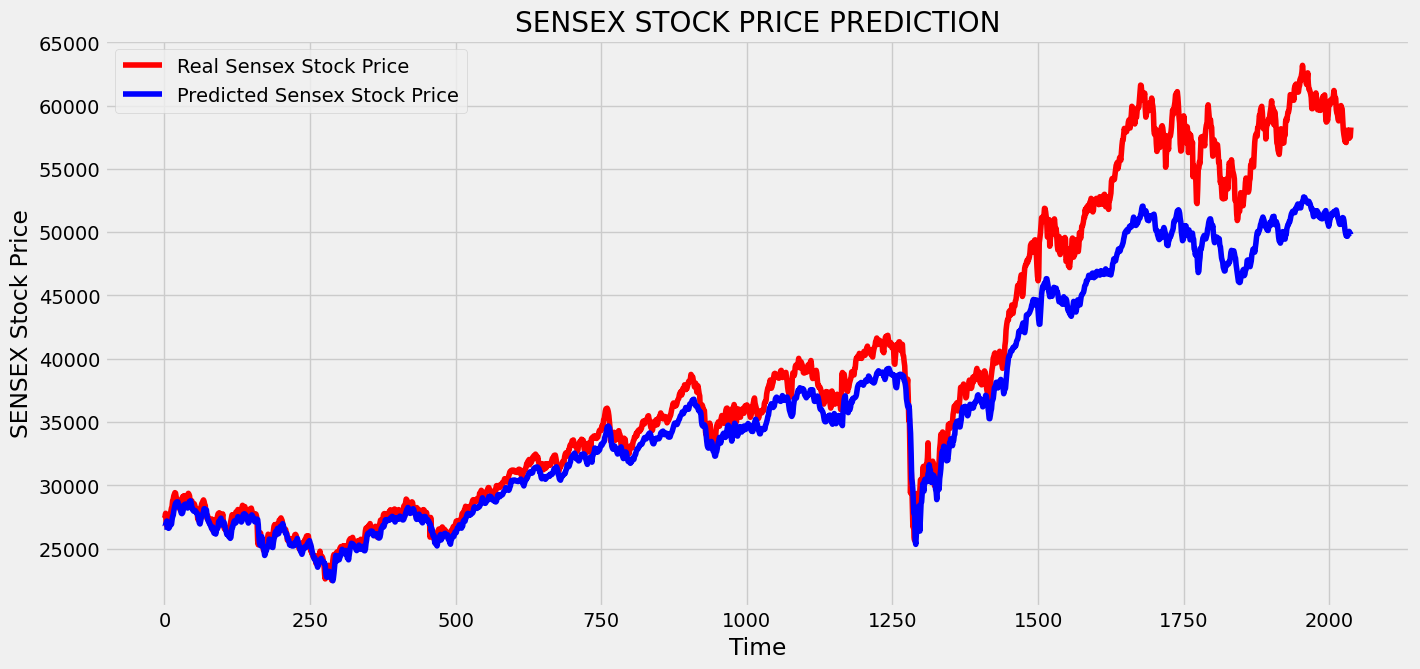

In [42]:
#Visualisng the results 
predictions_plot(test_set, predicted_stock_price)

In [43]:
rmse_return(test_set, predicted_stock_price)

The RMSE is 4032.9020540110664
